In [1]:
import requests
import datetime

import geopandas as gpd
from shapely.geometry import Point, Polygon

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# the Chicago Data Portal returns 1000 records at a time
# The data must be queried with the offset parameter 
business_df = pd.DataFrame()

for offset in range(0, 60000, 1000):
    # this is the url for active business licences in Chicago.
    active_business_url = f"https://data.cityofchicago.org/resource/uupf-x98q.json?$limit=1000&$offset={offset}"
    response = requests.get(active_business_url)
    offset_df = pd.DataFrame(response.json())
    business_df = pd.concat([business_df,offset_df])

In [3]:
today = datetime.datetime.today().strftime('%m-%d-%Y')

In [4]:
print(f"There are {business_df.shape[0]} active businesses on " 
    + f"{today}")

There are 53435 active businesses on 05-19-2024


In [5]:
print(f"There are {len(business_df['address'].unique())} "
    + "unique business addresses as of "
    + f"{today}")

There are 35636 unique business addresses as of 05-19-2024


In [6]:
def create_geo_df(business_df):
    
    crs = {'init':'EPSG:4326'}
    geometry = [Point(xy) for xy in zip(business_df['longitude'], business_df['latitude'])]
    geo_df = gpd.GeoDataFrame(business_df, 
                          crs=crs,
                          geometry = geometry)
    
    return geo_df

In [85]:
def create_chicago_map(geo_df, markersize, color=False):
    shape_file = "../shape_files/geo_export_13b5a44a-41a4-464a-8d09-00ab1c022c4d.shp"
    chicago_map = gpd.read_file(shape_file)
   
    fig, ax = plt.subplots(figsize = (10,10))
    chicago_map.to_crs(epsg=4326).plot(ax=ax, color='lightgrey')
    if not color:
        geo_df.plot(ax=ax, markersize=markersize)
    else:
        geo_df.plot(ax=ax, markersize=markersize, color=geo_df.color, legend=True)
    ax.set_title('Businesses in Chicago')

In [86]:
geo_df = create_geo_df(business_df)


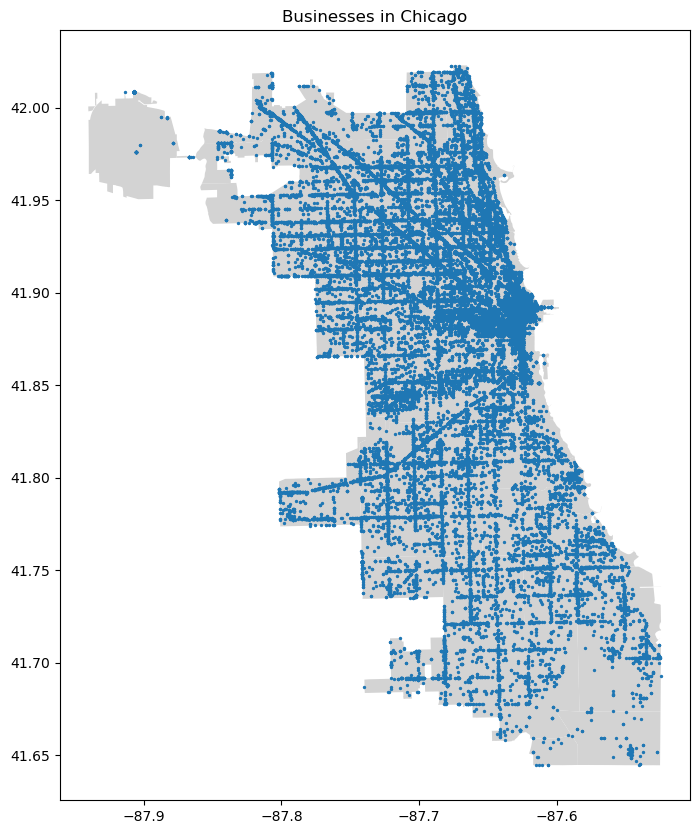

In [79]:
create_chicago_map(geo_df, markersize=2)

In [ ]:
len(business_df.license_description.value_counts())

56

In [ ]:
business_df.license_description.value_counts()

license_description
Limited Business License                               16413
Retail Food Establishment                              11025
Regulated Business License                              7944
Consumption on Premises - Incidental Activity           2768
Tobacco                                                 2249
Motor Vehicle Services License                          1387
Peddler License                                         1216
Package Goods                                           1086
Children's Services Facility License                     860
Pharmaceutical Representative                            853
Public Place of Amusement                                824
Tavern                                                   807
Outdoor Patio                                            732
Manufacturing Establishments                             673
Shared Kitchen User (Long Term)                          635
Commercial Garage                                        520
Fill

In [88]:
colors = {"Limited Business License": "red",                          
"Retail Food Establishment": "green",                             
"Regulated Business License": "blue",                             
"Consumption on Premises - Incidental Activity":"yellow"
}      

geo_df["color"] = geo_df["license_description"].map(colors)
geo_df["color"].fillna("black", inplace=True)

In [89]:
geo_df["color"].value_counts()

color
red       16413
black     15285
green     11025
blue       7944
yellow     2768
Name: count, dtype: int64

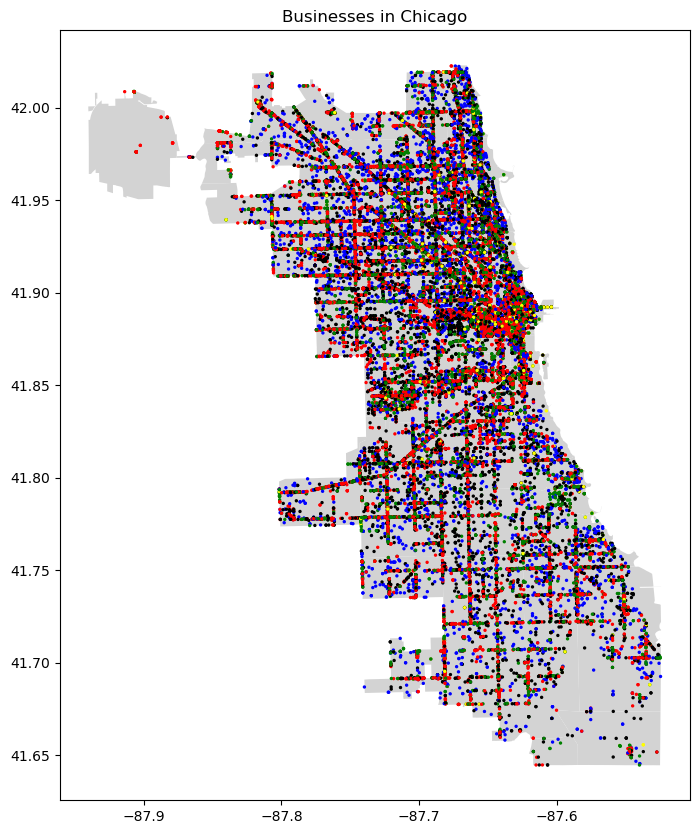

In [90]:
create_chicago_map(geo_df, markersize=2, color=True)
